In [28]:
import rasterio

In [29]:
image_path=r"C:\Users\Azista Industries\OneDrive\Desktop\Tasks\2672024\EuroSAT_MS\HerbaceousVegetation\HerbaceousVegetation_1.tif"
image = rasterio.open(image_path)
image.read()

array([[[1412, 1412, 1416, ..., 1219, 1224, 1231],
        [1412, 1412, 1416, ..., 1219, 1224, 1231],
        [1422, 1422, 1425, ..., 1221, 1227, 1234],
        ...,
        [1541, 1541, 1538, ..., 1194, 1195, 1197],
        [1538, 1538, 1534, ..., 1196, 1198, 1200],
        [1533, 1533, 1529, ..., 1199, 1200, 1203]],

       [[1279, 1279, 1267, ...,  973,  997,  977],
        [1279, 1279, 1267, ...,  973,  997,  977],
        [1398, 1398, 1377, ...,  945,  970,  969],
        ...,
        [1490, 1490, 1498, ..., 1013,  977,  940],
        [1524, 1524, 1496, ...,  968, 1034,  985],
        [1488, 1488, 1499, ...,  934,  965, 1001]],

       [[1234, 1234, 1212, ...,  791,  817,  811],
        [1234, 1234, 1212, ...,  791,  817,  811],
        [1382, 1382, 1361, ...,  762,  803,  815],
        ...,
        [1544, 1544, 1524, ...,  885,  829,  760],
        [1546, 1546, 1534, ...,  819,  875,  807],
        [1529, 1529, 1510, ...,  761,  817,  880]],

       ...,

       [[3163, 3163, 317

In [30]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 64,
 'height': 64,
 'count': 13,
 'crs': CRS.from_epsg(32630),
 'transform': Affine(10.010633277078101, 0.0, 533701.6159570202,
        0.0, -10.001446950092719, 5946422.5058129765)}

In [31]:
image.name

'C:/Users/Azista Industries/OneDrive/Desktop/Tasks/2672024/EuroSAT_MS/HerbaceousVegetation/HerbaceousVegetation_1.tif'

In [32]:
image.count

13

In [33]:
image.shape

(64, 64)

In [34]:
image.width

64

In [35]:
image.height

64

In [36]:
image.crs

CRS.from_epsg(32630)

In [37]:
image.descriptions

(None, None, None, None, None, None, None, None, None, None, None, None, None)

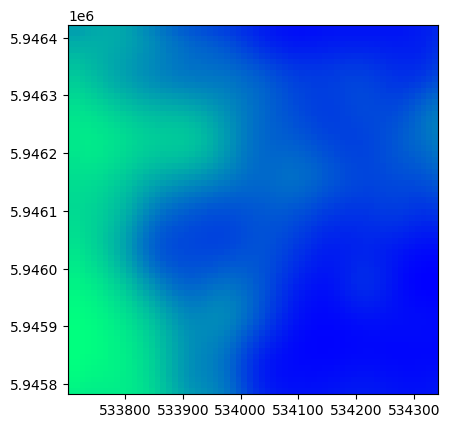

<Axes: >

In [42]:
from rasterio.plot import show
show(image,cmap='winter')

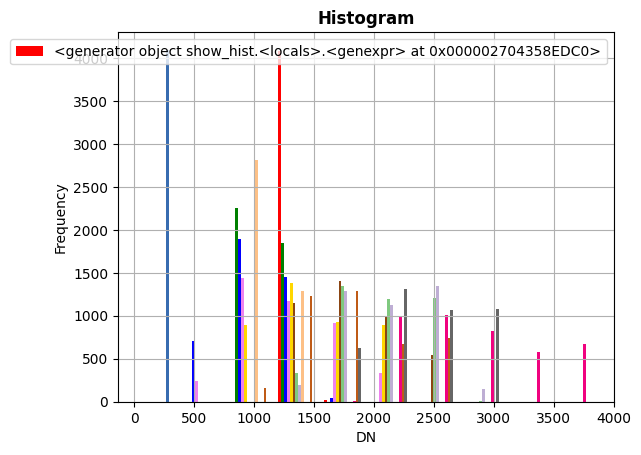

In [57]:
from rasterio.plot import show_hist
show_hist(image, bins=10)

In [69]:
with rasterio.open(r"C:\Users\Azista Industries\OneDrive\Desktop\Tasks\2672024\New folder",'w',driver=image.driver,
height=image.height, width=image.width,count=image.count,crs=image.crs,
transform=image.transform,dtype=(image.meta['dtype'])) as src:
    src.write(image)

RasterioIOError: Attempt to create new tiff file 'C:/Users/Azista Industries/OneDrive/Desktop/Tasks/2672024/New folder' failed: Permission denied

In [70]:
transform=image.transform
print(transform.a)

10.010633277078101


In [71]:
transform.e

-10.001446950092719

In [73]:
import rasterio
from pyproj import Transformer

with rasterio.open(image_path) as src:
    crs = src.crs

    # Create a transformer to convert from the image CRS to geographic coordinates (lat, lon)
    transformer = Transformer.from_crs(crs, 'EPSG:4326', always_xy=True)

    # Function to get latitude and longitude of a specific pixel
    def get_lat_lon(row, col):
        # Convert row/col to x/y
        x, y = src.xy(row, col)
        # Transform x/y to lon/lat
        lon, lat = transformer.transform(x, y)
        return lat, lon

    # Example usage: get latitude and longitude of the top-left pixel
    lat, lon = get_lat_lon(0, 0)
    print(f'Top-left pixel: Latitude = {lat}, Longitude = {lon}')

    # Example usage: get latitude and longitude of the bottom-right pixel
    lat, lon = get_lat_lon(src.height - 1, src.width - 1)
    print(f'Bottom-right pixel: Latitude = {lat}, Longitude = {lon}')

    # Example usage: get latitude and longitude of the center pixel
    lat, lon = get_lat_lon(src.height // 2, src.width // 2)
    print(f'Center pixel: Latitude = {lat}, Longitude = {lon}')


Top-left pixel: Latitude = 53.665415058332094, Longitude = -2.4898639184508164
Bottom-right pixel: Latitude = 53.65971072527972, Longitude = -2.4803890766435837
Center pixel: Latitude = 53.662517712940264, Longitude = -2.485050980634801
